In [1]:
import pandas as pd
import numpy as np

In [2]:
import pvlib

from pvlib.pvsystem import PVSystem

from pvlib.location import Location

from pvlib.modelchain import ModelChain

from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

#Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #for 3D plots 
#import seaborn as sns

#sklearn
from sklearn.cluster import AgglomerativeClustering #Heirarchial Clustering
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 
from sklearn.metrics import mean_squared_error, r2_score
#from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.model_selection import train_test_split #split data into training and test sets
from sklearn.tree import DecisionTreeClassifier #decision tree classifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit
from scipy.cluster.hierarchy import dendrogram
from sklearn import decomposition
from sklearn import datasets
from sklearn import tree 


from scipy.stats import pearsonr
import matplotlib.pyplot as plt


In [3]:
url = "/Users/zacblackburn/Desktop/3b51d13be28ca10bd0ea0db11a037480/Weather_2019ProjectA.csv"

In [4]:
url

'/Users/zacblackburn/Desktop/3b51d13be28ca10bd0ea0db11a037480/Weather_2019ProjectA.csv'

In [5]:
import datetime as datetime

df = pd.read_csv(url, index_col = 'datetime',
                parse_dates = {'datetime':['Year', 'Month', 'Day', 'Hour', 'Minute']},
                date_parser = lambda x: datetime.datetime.strptime(x, '%Y %m %d %H %M'))

In [6]:
df

,dhi,dni,ghi,wind_speed,temp_air
datetime,,,,,
2019-01-01 00:30:00,0,0,0,1.4,5.8
2019-01-01 01:30:00,0,0,0,1.6,5.8
2019-01-01 02:30:00,0,0,0,1.9,5.7
2019-01-01 03:30:00,0,0,0,2.3,5.5
2019-01-01 04:30:00,0,0,0,2.6,5.2
...,...,...,...,...,...
2019-12-31 19:30:00,0,0,0,1.3,8.4
2019-12-31 20:30:00,0,0,0,1.5,7.9
2019-12-31 21:30:00,0,0,0,1.4,7.3


In [7]:
weather = df[['dhi', 'dni', 'ghi', 'wind_speed', 'temp_air']]

In [8]:
weather

,dhi,dni,ghi,wind_speed,temp_air
datetime,,,,,
2019-01-01 00:30:00,0,0,0,1.4,5.8
2019-01-01 01:30:00,0,0,0,1.6,5.8
2019-01-01 02:30:00,0,0,0,1.9,5.7
2019-01-01 03:30:00,0,0,0,2.3,5.5
2019-01-01 04:30:00,0,0,0,2.6,5.2
...,...,...,...,...,...
2019-12-31 19:30:00,0,0,0,1.3,8.4
2019-12-31 20:30:00,0,0,0,1.5,7.9
2019-12-31 21:30:00,0,0,0,1.4,7.3


In [9]:
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')

cec_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')

sandia_module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']

cec_inverter = cec_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

In [10]:
location = Location(latitude=30.61, longitude=-96.34)

system = PVSystem(surface_tilt=20, surface_azimuth=200,
                  module_parameters=sandia_module,
                  inverter_parameters=cec_inverter,
                  temperature_model_parameters=temperature_model_parameters)


mc = ModelChain(system, location)

In [11]:
print(mc)

ModelChain: 
  name: None
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses


In [12]:
df.dtypes

dhi             int64
dni             int64
ghi             int64
wind_speed    float64
temp_air      float64
dtype: object

In [13]:
#df[["temp_air"]]=df[["temp_air"]].astype("float")

In [14]:
mc.run_model(weather=df)

ModelChain: 
  name: None
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [15]:
print(mc)

ModelChain: 
  name: None
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses


In [16]:
#weather = pd.DataFrame([[1050, 1000, 100, 30, 5]],
                       #columns=['ghi', 'dni', 'dhi', 'temp_air', 'wind_speed'],
                      # index=[pd.Timestamp('20190401 1200', tz='US/Central')])


In [17]:
mc.run_model(weather)

ModelChain: 
  name: None
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [18]:
mc.aoi


datetime
2019-01-01 00:30:00     88.680985
2019-01-01 01:30:00    102.248038
2019-01-01 02:30:00    115.992232
2019-01-01 03:30:00    129.784146
2019-01-01 04:30:00    143.451581
                          ...    
2019-12-31 19:30:00     35.692137
2019-12-31 20:30:00     41.644589
2019-12-31 21:30:00     51.224423
2019-12-31 22:30:00     62.761802
2019-12-31 23:30:00     75.006423
Name: aoi, Length: 8760, dtype: float64

In [19]:
mc.cell_temperature

datetime
2019-01-01 00:30:00    5.8
2019-01-01 01:30:00    5.8
2019-01-01 02:30:00    5.7
2019-01-01 03:30:00    5.5
2019-01-01 04:30:00    5.2
                      ... 
2019-12-31 19:30:00    8.4
2019-12-31 20:30:00    7.9
2019-12-31 21:30:00    7.3
2019-12-31 22:30:00    6.6
2019-12-31 23:30:00    6.1
Length: 8760, dtype: float64

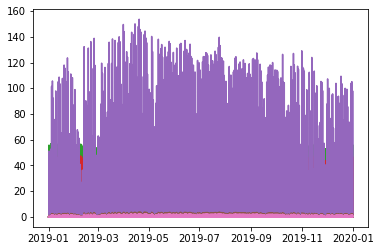

In [20]:
dc = mc.dc
plt.plot(dc)
plt.show()

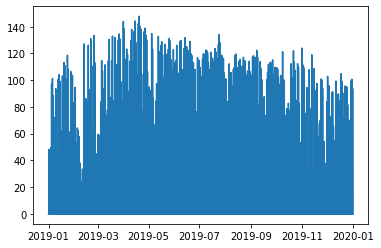

In [21]:
ac = mc.ac
plt.plot(ac)
plt.show()

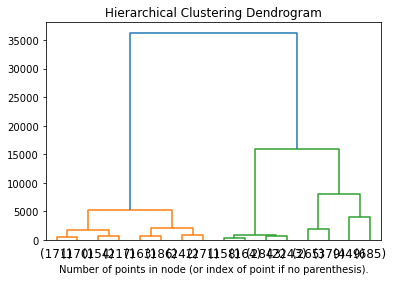

In [22]:
X = df[['dni', 'temp_air']]
 
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
                                     
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

[9.99192918e-01 8.07081947e-04]
[29181.89458187   829.36867322]
[[ 0.99993361  0.01152284]
 [ 0.01152284 -0.99993361]]


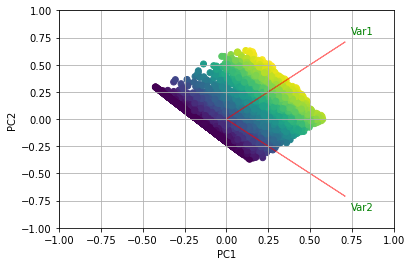

In [23]:

pca = PCA(n_components=2)
pca_comp = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.components_)

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca = PCA()

x_new = pca.fit_transform(X)
y = df['dni']

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

Coefficients: 
 [[0.00170539]]


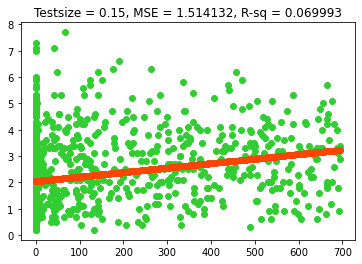

Coefficients: 
 [[0.00172491]]


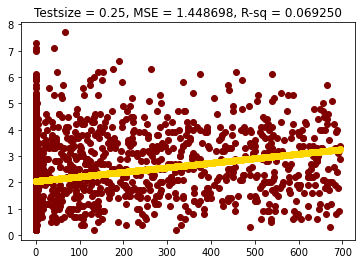

Coefficients: 
 [[0.00173501]]


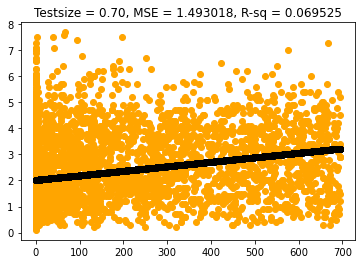

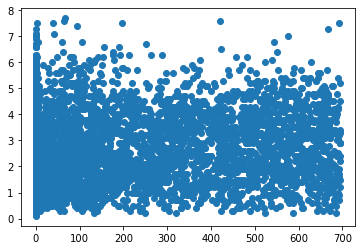

In [24]:
df_auto_reg10 = df[['ghi', 'wind_speed']][df['ghi'].between(df['ghi'].quantile(0.1), df['ghi'].quantile(0.9))]
X = df_auto_reg10['ghi']
y = df_auto_reg10['wind_speed']  

#test size = 0.15 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Coefficients: \n', reg.coef_)

reg_stat2 = [mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred)] 
plt.title('Testsize = 0.15, MSE = %f, R-sq = %f' %tuple(reg_stat2))
plt.scatter(X_test, y_test,  color='limegreen')
plt.scatter(X_test, y_pred, label = 'MSE = %f, R-sq = %f' % tuple(reg_stat2) , color='orangered')
plt.show()


#test size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Coefficients: \n', reg.coef_)

reg_stat2 = [mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred)] 
plt.title('Testsize = 0.25, MSE = %f, R-sq = %f' %tuple(reg_stat2))
plt.scatter(X_test, y_test,  color='maroon')
plt.scatter(X_test, y_pred, label = 'MSE = %f, R-sq = %f' % tuple(reg_stat2) , color='gold')
plt.show()

#test size = 0.70 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=9)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Coefficients: \n', reg.coef_)

reg_stat2 = [mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred)] 
plt.title('Testsize = 0.70, MSE = %f, R-sq = %f' %tuple(reg_stat2))
plt.scatter(X_test, y_test,  color='orange')
plt.scatter(X_test, y_pred, label = 'MSE = %f, R-sq = %f' % tuple(reg_stat2) , color='black')
plt.show()

plt.scatter(X,y)
plt.show()


In [39]:
temp_air = df[['temp_air']]

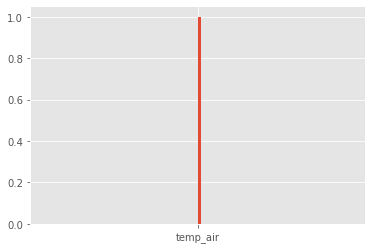

In [42]:

plt.style.use('ggplot')
plt.hist(temp_air, bins=100)
plt.show()

In [43]:
mc.hist

AttributeError: 'ModelChain' object has no attribute 'hist'